In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
X = np.array([
    [1],
    [2],
    [3],
    [4],
    [5],
    [6]
])

y = np.array([1, 1, 1, 0, 0, 0])

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression(penalty='none',solver='newton-cg')

In [33]:
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
lr.coef_

array([[-18.33148189]])

In [35]:
lr.intercept_

array([64.11147504])

In [36]:
def sigmoid(z):
    return 1/(1+np.exp(z))

In [37]:
theta_0_li, theta_1_li = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))

In [38]:
def cost_rmse(theta_0, theta_1):
    y_hat = sigmoid(theta_0 + theta_1*X)
    err = np.sum((y-y_hat)**2)
    return err

In [39]:
z = np.zeros((len(theta_0_li), len(theta_0_li)))
for i in range(len(theta_0_li)):
    for j in range(len(theta_0_li)):
        z[i, j] = cost_rmse(theta_0_li[i, j], theta_1_li[i, j])

Text(0.5, 1.0, 'RMSE contour plot')

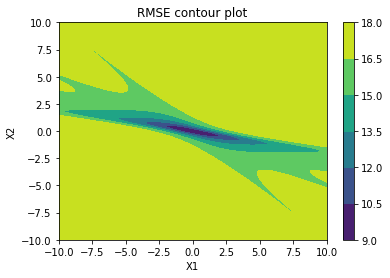

In [50]:
#latexify()
plt.contourf(theta_0_li, theta_1_li, z)
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar()
plt.title('RMSE contour plot')

Text(0.5, 0.92, 'RMSE surface plot')

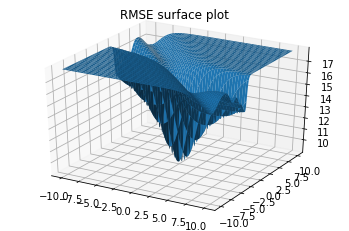

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#latexify()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta_0_li, theta_1_li, z)
ax.set_title('RMSE surface plot')

In [42]:
import pandas as pd

In [43]:
pd.DataFrame(z).min().min()

9.01794626038055

In [44]:
def cost_2(theta_0, theta_1):
    y_hat = sigmoid(theta_0 + theta_1*X)
    
    err = -np.sum((y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
    return err

In [45]:
z2 = np.zeros((len(theta_0_li), len(theta_0_li)))
for i in range(len(theta_0_li)):
    for j in range(len(theta_0_li)):
        z2[i, j] = cost_2(theta_0_li[i, j], theta_1_li[i, j])

/Users/ritikdutta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/ritikdutta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


/Users/ritikdutta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  import sys


Text(0.5, 0.92, 'Cross-entropy surface plot')

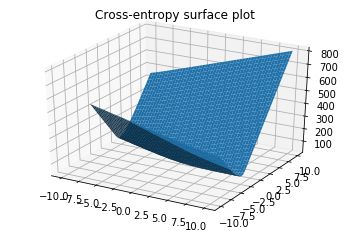

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#latexify()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta_0_li, theta_1_li, z2)
ax.set_title('Cross-entropy surface plot')

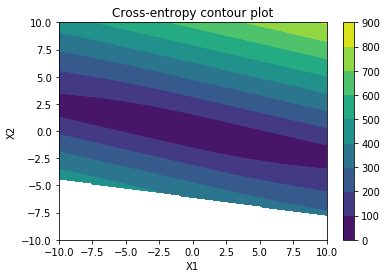

In [49]:
#latexify()
plt.contourf(theta_0_li, theta_1_li, z2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Cross-entropy contour plot')
plt.colorbar()